In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from __future__ import division
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [2]:
df = pd.read_csv('dataset/creditcard.csv')
df_fe = df.drop(['V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'], axis =1)

In [3]:
count_normal_transacation = len(df_fe[df_fe["Class"]==0]) # normal transaction are repersented by 0
count_fraud_transacation = len(df_fe[df_fe["Class"]==1]) # fraud by 1
fraud_indices = np.array(df_fe[df_fe.Class==1].index)
normal_indices = np.array(df_fe[df_fe.Class==0].index)

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data

def undersample(df, normal_indices, fraud_indices, multiple): # multiple denote the normal data = multiple * fraud data
    normal_indices_undersample = np.array(np.random.choice(normal_indices,(multiple*count_fraud_transacation),replace=False))
    undersample_data = np.concatenate([fraud_indices, normal_indices_undersample])
    undersample_data = df.iloc[undersample_data,:]
    
    print "the normal transacation proportion is :", len(undersample_data[undersample_data.Class==0])/len(undersample_data)
    print "the fraud transacation proportion is :", len(undersample_data[undersample_data.Class==1])/len(undersample_data)
    print "total number of record in resampled data is:",len(undersample_data)
    return(undersample_data)

In [4]:
def prediction_algorithms(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred = model.predict(features_test)
    cm = confusion_matrix(labels_test,pred)
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    print "the recall for this model is :", recall
    print "The accuracy is :", (cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    loss = (1 - precision) * 88.29 + (1 - recall) * 122.12
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print "TP",cm[1,1] # no of fraud transaction which are predicted fraud
    print "TN",cm[0,0] # no. of normal transaction which are predited normal
    print "FP",cm[0,1] # no of normal transaction which are predicted fraud
    print "FN",cm[1,0] # no of fraud Transaction which are predicted normal
    sns.heatmap(cm, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "Classification Report:" 
    print(classification_report(labels_test,pred))
    print "The loss is : ", loss

In [5]:
X = df_fe.iloc[:, df_fe.columns != "Class"]
y = df_fe.iloc[:, df_fe.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Logistic Regression Feature Importance
***

In [10]:
undersample_data = undersample(df, normal_indices,fraud_indices, 132)
print ""
print "the model classification for 132 proportion"
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LogisticRegression(random_state=0)
lr.fit(X_train/np.std(X_train, 0), y_train.values.ravel())
lr_feature_importances = [(feature, abs(round(importance, 2))) for feature, importance in zip(X_train.columns, lr.coef_[0])]
lr_feature_importances = sorted(lr_feature_importances, key = lambda x: x[1], reverse = True)

the normal transacation proportion is : 0.992481203008
the fraud transacation proportion is : 0.00751879699248
total number of record in resampled data is: 65436

the model classification for 132 proportion


In [45]:
lr_features_ranked = []
for i in range(0, len(lr_feature_importances)):
    lr_features_ranked.append(lr_feature_importances[i][0])

for i in range(0, int(len(lr_features_ranked)*0.75)):
#     print lr_features_ranked[0:i+1]
    features = lr_features_ranked[0:i+1]
    features.append('Class')
    print features

['V4', 'Class']
['V4', 'V10', 'Class']
['V4', 'V10', 'V14', 'Class']
['V4', 'V10', 'V14', 'V22', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'V21', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'V21', 'V13', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'V21', 'V13', 'V1', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'V21', 'V13', 'V1', 'V8', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'V21', 'V13', 'V1', 'V8', 'Amount', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'V21', 'V13', 'V1', 'V8', 'Amount', 'V6', 'Class']
['V4', 'V10', 'V14', 'V22', 'Time', 'V20', 'V9', 'V27', 'V21', 'V13', 'V1', 'V8', 'Amount', 'V6', 'V15', 'Class']
['V4', 'V10', 'V14', 'V22

[('V4', 0.89),
 ('V10', 0.78),
 ('V14', 0.54),
 ('V22', 0.41),
 ('Time', 0.37),
 ('V20', 0.33),
 ('V9', 0.32),
 ('V27', 0.29),
 ('V21', 0.27),
 ('V13', 0.25),
 ('V1', 0.21),
 ('V8', 0.21),
 ('Amount', 0.2),
 ('V6', 0.16),
 ('V15', 0.16),
 ('V5', 0.14),
 ('V7', 0.13),
 ('V16', 0.12),
 ('V26', 0.11),
 ('V25', 0.1),
 ('V28', 0.08),
 ('V3', 0.07),
 ('V12', 0.06),
 ('V19', 0.06),
 ('V17', 0.04),
 ('V23', 0.04),
 ('V11', 0.03),
 ('V24', 0.03),
 ('V2', 0.02),
 ('V18', 0.01)]

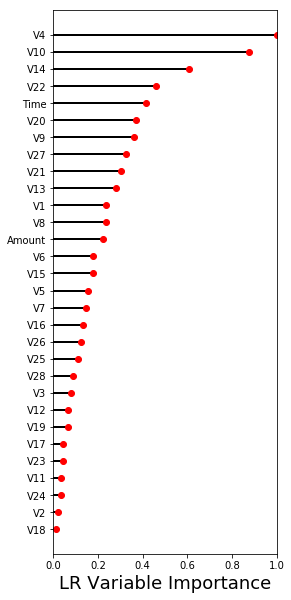

In [98]:
ft_lr = pd.DataFrame(lr_feature_importances)
ft_lr.columns = ['feature','importance']
ft_lr.set_index(['feature'])
ft_lr.iloc[0,:]['importance']
ft_lr['importance'] = ft_lr.importance/ft_lr.iloc[0,:]['importance']
plt.figure(figsize=(4,10))
plt.xlim(0,1)
for key,value in zip(range(1,31),ft_lr['importance']):
    plt.axhline(y=key, xmin=0, xmax=value, linewidth=2, color = 'k')
    plt.plot([value],[key], 'ro')
plt.yticks(range(1,31),ft_lr['feature'])
plt.xlabel("LR Variable Importance",fontsize=18)
plt.gca().invert_yaxis()
lr_feature_importances

### Try features which have their importances greater than 0.08
***

In [22]:
df_lr = df.drop(['V28', 'V3', 'V12', 'V19', 'V17', 'V23', 'V11', 'V24', 'V2', 'V18'], axis=1)
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 21 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27       284807 non-null float64
Amount    284807 non-null float64
Class     284807 non-null int64
dtypes: float64(20), int64(1)
memory usage: 45.6 MB


the normal transacation proportion is : 0.994413407821
the fraud transacation proportion is : 0.00558659217877
total number of record in resampled data is: 88068

the model classification for 178 proportion
the recall for this model is : 0.6646341463414634
The accuracy is : 0.9972226806223161
TP 327
TN 283689
FP 626
FN 165


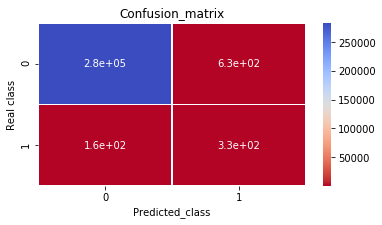

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.34      0.66      0.45       492

avg / total       1.00      1.00      1.00    284807

The loss is :  98.95019809075322
________________________________________________________________________________________________________



In [27]:
undersample_data = undersample(df_lr, normal_indices,fraud_indices, 178)
print ""
print "the model classification for 178 proportion"
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X_test = df_lr.iloc[:, df_lr.columns != "Class"]
y_test = df_lr.iloc[:, df_lr.columns == "Class"]
lr = LogisticRegression(random_state=0)
prediction_algorithms(lr, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

The table shows the optimal results with different features. It is clear that using all the features and a proportion of normal/fraud = 132 gives the best results amoung the 3.

However, as can be seen from the interest curve in feature selection and bench mark part, the performance of logistic regression is very unstable when proportion changes. Thus, Logistic Regression is not very recommended here since we cannot decide a optimal proportion due to the unstable performance.

| Features          | Precision | Recall | F1   | Accuracy |
|-------------------|-----------|--------|------|----------|
| 19 selected by fe | 0.54      | 0.54   | 0.54 | 0.99     |
| Top 21            | 0.34      | 0.66   | 0.47 | 0.99     |
| All*              | 0.60      | 0.51   | 0.55 | 0.99     |

***

## Random Forest Feature Importance
***

In [64]:
rf = RandomForestClassifier(n_estimators = 100 , random_state = 0)
rf.fit(X_train, y_train.values.ravel())
importances = list(rf.feature_importances_)
rf_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
rf_feature_importances = sorted(rf_feature_importances, key = lambda x: x[1], reverse = True)

[('V17', 0.18),
 ('V12', 0.16),
 ('V14', 0.12),
 ('V11', 0.09),
 ('V16', 0.07),
 ('V10', 0.06),
 ('V9', 0.04),
 ('V18', 0.04),
 ('V4', 0.03),
 ('V7', 0.03),
 ('V21', 0.03),
 ('Time', 0.02),
 ('V1', 0.02),
 ('V2', 0.02),
 ('V3', 0.02),
 ('V5', 0.02),
 ('V6', 0.02),
 ('V19', 0.02),
 ('Amount', 0.02)]

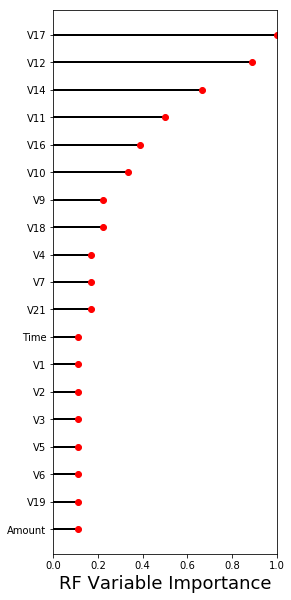

In [52]:
ft_rf = pd.DataFrame(rf_feature_importances)
ft_rf.columns = ['feature','importance']
ft_rf.set_index(['feature'])
ft_rf.iloc[0,:]['importance']
ft_rf['importance'] = ft_rf.importance/ft_rf.iloc[0,:]['importance']
plt.figure(figsize=(4,10))
plt.xlim(0,1)
for key,value in zip(range(1,20),ft_rf['importance']):
    plt.axhline(y=key, xmin=0, xmax=value, linewidth=2, color = 'k')
    plt.plot([value],[key], 'ro')
plt.yticks(range(1,20),ft_rf['feature'])
plt.xlabel("RF Variable Importance",fontsize=18)
plt.gca().invert_yaxis()
rf_feature_importances

### Try features which have their importances greater than 0.02
***

In [5]:
df_rf = df_fe.drop(['Time','V1','V2','V3','V5','V6','V19','Amount'], axis =1)
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 12 columns):
V4       284807 non-null float64
V7       284807 non-null float64
V9       284807 non-null float64
V10      284807 non-null float64
V11      284807 non-null float64
V12      284807 non-null float64
V14      284807 non-null float64
V16      284807 non-null float64
V17      284807 non-null float64
V18      284807 non-null float64
V21      284807 non-null float64
Class    284807 non-null int64
dtypes: float64(11), int64(1)
memory usage: 26.1 MB


the normal transacation proportion is : 0.985915492958
the fraud transacation proportion is : 0.0140845070423
total number of record in resampled data is: 34932

the model classification for 70 proportion
the recall for this model is : 0.9573170731707317
The accuracy is : 0.999462794102673
TP 471
TN 284183
FP 132
FN 21


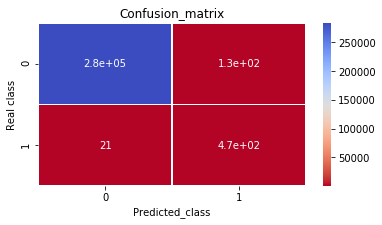

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.78      0.96      0.86       492

avg / total       1.00      1.00      1.00    284807

The loss is :  24.53960320349473
________________________________________________________________________________________________________



In [8]:
undersample_data = undersample(df_rf, normal_indices,fraud_indices, 70)
print ""
print "the model classification for 70 proportion"
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X_test = df_rf.iloc[:, df_rf.columns != "Class"]
y_test = df_rf.iloc[:, df_rf.columns == "Class"]
rf = RandomForestClassifier(n_estimators=100, random_state=0)
prediction_algorithms(rf, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

### Try out top 6 features
***

In [9]:
df_rf1 = df_rf.drop(['V9', 'V18', 'V4', 'V7', 'V21'], axis=1)
df_rf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 7 columns):
V10      284807 non-null float64
V11      284807 non-null float64
V12      284807 non-null float64
V14      284807 non-null float64
V16      284807 non-null float64
V17      284807 non-null float64
Class    284807 non-null int64
dtypes: float64(6), int64(1)
memory usage: 15.2 MB


the normal transacation proportion is : 0.985915492958
the fraud transacation proportion is : 0.0140845070423
total number of record in resampled data is: 34932

the model classification for 70 proportion
the recall for this model is : 0.9573170731707317
The accuracy is : 0.9994838610006074
TP 471
TN 284189
FP 126
FN 21


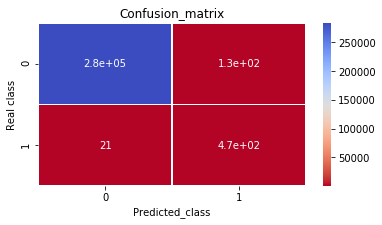

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.79      0.96      0.87       492

avg / total       1.00      1.00      1.00    284807

The loss is :  23.846509376149047
________________________________________________________________________________________________________



In [10]:
undersample_data = undersample(df_rf1, normal_indices,fraud_indices, 70)
print ""
print "the model classification for 70 proportion"
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X_test = df_rf1.iloc[:, df_rf1.columns != "Class"]
y_test = df_rf1.iloc[:, df_rf1.columns == "Class"]
rf = RandomForestClassifier(n_estimators=100, random_state=0)
prediction_algorithms(rf, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

The table below shows the results using different number of features. It seems using the 19 features selected by our feature engineering, top 11 features ranked by feature importances or even all the features give us very similar results while using top 6 features gives bad result. Thus, we will be using 19 features selected after feature engineering in our model selection and the proportion is 40.

| Features        | Precision | Recall | F1 Score |  Accuracy  |
|-----------------|-----------|--------|----------|------------|
| 19 picked by fe*| 0.82      | 0.96   | 0.88     | 0.99       |
| Top 11          | 0.78      | 0.96   | 0.86     | 0.99       |
| Top 6           | 0.79      | 0.96   | 0.87     | 0.99       |
| All features    | 0.81      | 0.96   | 0.88     | 0.99       |
***

## Gradient Boosting Decision Tree Feature Importance
***

In [63]:
gbt = GradientBoostingClassifier(random_state = 0)
gbt.fit(X_train, y_train.values.ravel())
gbt_importances = list(gbt.feature_importances_)
gbt_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, gbt_importances)]
gbt_feature_importances = sorted(gbt_feature_importances, key = lambda x: x[1], reverse = True)

[('V11', 0.35),
 ('V17', 0.35),
 ('V14', 0.13),
 ('V10', 0.08),
 ('V12', 0.04),
 ('V4', 0.02),
 ('Time', 0.0),
 ('V1', 0.0),
 ('V2', 0.0),
 ('V3', 0.0),
 ('V5', 0.0),
 ('V6', 0.0),
 ('V7', 0.0),
 ('V9', 0.0),
 ('V16', 0.0),
 ('V18', 0.0),
 ('V19', 0.0),
 ('V21', 0.0),
 ('Amount', 0.0)]

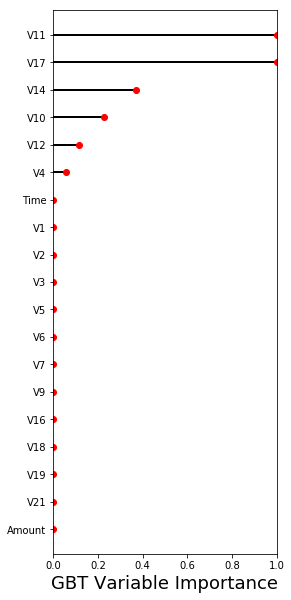

In [72]:
ft_gbt = pd.DataFrame(gbt_feature_importances)
ft_gbt.columns = ['feature','importance']
ft_gbt.set_index(['feature'])
ft_gbt.iloc[0,:]['importance']
ft_gbt['importance'] = ft_gbt.importance/ft_gbt.iloc[0,:]['importance']
plt.figure(figsize=(4,10))
plt.xlim(0,1)
for key,value in zip(range(1,20),ft_gbt['importance']):
    plt.axhline(y=key, xmin=0, xmax=value, linewidth=2, color = 'k')
    plt.plot([value],[key], 'ro')
plt.yticks(range(1,20),ft_gbt['feature'])
plt.xlabel("GBT Variable Importance",fontsize=18)
plt.gca().invert_yaxis()
gbt_feature_importances

In [11]:
df_gbt = df_fe.loc[:, ['V11', 'V17', 'V14', 'V10', 'V12', 'V4', 'Class']]
df_gbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 7 columns):
V11      284807 non-null float64
V17      284807 non-null float64
V14      284807 non-null float64
V10      284807 non-null float64
V12      284807 non-null float64
V4       284807 non-null float64
Class    284807 non-null int64
dtypes: float64(6), int64(1)
memory usage: 15.2 MB


the normal transacation proportion is : 0.991452991453
the fraud transacation proportion is : 0.00854700854701
total number of record in resampled data is: 57564

the model classification for 116 proportion
the recall for this model is : 0.9308943089430894
The accuracy is : 0.99913625718469
TP 458
TN 284103
FP 212
FN 34


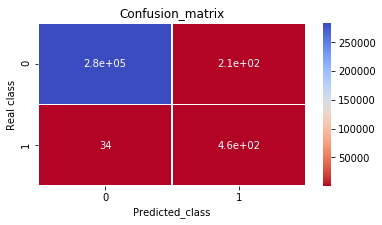

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.68      0.93      0.79       492

avg / total       1.00      1.00      1.00    284807

The loss is :  36.37572430530276
________________________________________________________________________________________________________



In [21]:
undersample_data = undersample(df_gbt, normal_indices,fraud_indices, 116)
print ""
print "the model classification for 116 proportion"
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X_test = df_gbt.iloc[:, df_gbt.columns != "Class"]
y_test = df_gbt.iloc[:, df_gbt.columns == "Class"]
gbt = GradientBoostingClassifier(random_state=0)
prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

## Rank feature importances using all the features
***

In [74]:
X1 = df.iloc[:, df.columns != "Class"]
y1 = df.iloc[:, df.columns == "Class"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0)

In [20]:
gbt1 = GradientBoostingClassifier(random_state = 0)
gbt1.fit(X_train1, y_train1.values.ravel())
importances = list(gbt1.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X1.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[('V16', 0.37),
 ('V11', 0.3),
 ('V26', 0.09),
 ('V3', 0.05),
 ('V14', 0.04),
 ('V1', 0.02),
 ('V5', 0.02),
 ('V10', 0.02),
 ('V12', 0.02),
 ('V17', 0.02),
 ('V18', 0.02),
 ('V9', 0.01),
 ('V27', 0.01),
 ('Time', 0.0),
 ('V2', 0.0),
 ('V4', 0.0),
 ('V6', 0.0),
 ('V7', 0.0),
 ('V8', 0.0),
 ('V13', 0.0),
 ('V15', 0.0),
 ('V19', 0.0),
 ('V20', 0.0),
 ('V21', 0.0),
 ('V22', 0.0),
 ('V23', 0.0),
 ('V24', 0.0),
 ('V25', 0.0),
 ('V28', 0.0),
 ('Amount', 0.0)]

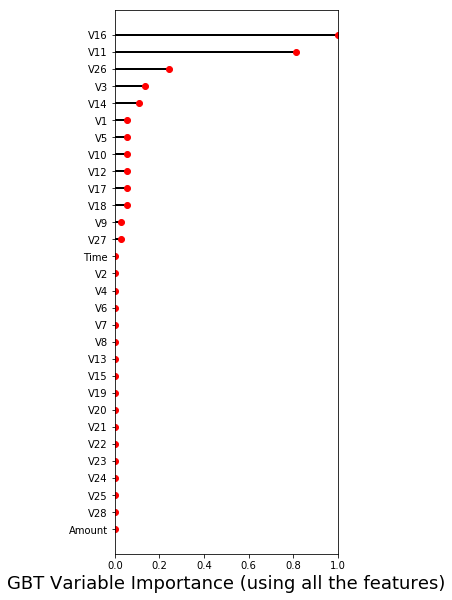

In [75]:
ft_gbt1 = pd.DataFrame(feature_importances)
ft_gbt1.columns = ['feature','importance']
ft_gbt1.set_index(['feature'])
ft_gbt1.iloc[0,:]['importance']
ft_gbt1['importance'] = ft_gbt1.importance/ft_gbt1.iloc[0,:]['importance']
plt.figure(figsize=(4,10))
plt.xlim(0,1)
for key,value in zip(range(1,31),ft_gbt1['importance']):
    plt.axhline(y=key, xmin=0, xmax=value, linewidth=2, color = 'k')
    plt.plot([value],[key], 'ro')
plt.yticks(range(1,31),ft_gbt1['feature'])
plt.xlabel("GBT Variable Importance (using all the features)",fontsize=18)
plt.gca().invert_yaxis()
feature_importances

### Top 13 features
***

In [14]:
df_gbt1 = df.loc[:, ['V16', 'V11', 'V26', 'V3', 'V14', 'V1', 'V5', 'V10', 'V12', 'V17', 'V18', 'V9', 'V27', 'Class']]
df_gbt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 14 columns):
V16      284807 non-null float64
V11      284807 non-null float64
V26      284807 non-null float64
V3       284807 non-null float64
V14      284807 non-null float64
V1       284807 non-null float64
V5       284807 non-null float64
V10      284807 non-null float64
V12      284807 non-null float64
V17      284807 non-null float64
V18      284807 non-null float64
V9       284807 non-null float64
V27      284807 non-null float64
Class    284807 non-null int64
dtypes: float64(13), int64(1)
memory usage: 30.4 MB


the normal transacation proportion is : 0.994047619048
the fraud transacation proportion is : 0.00595238095238
total number of record in resampled data is: 82656

the model classification for 167 proportion
the recall for this model is : 0.7947154471544715
The accuracy is : 0.9992907477695422
TP 391
TN 284214
FP 101
FN 101


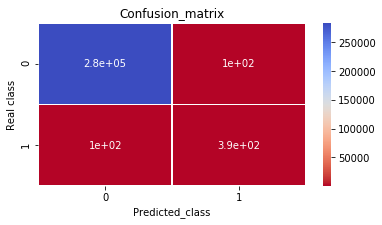

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.79      0.79      0.79       492

avg / total       1.00      1.00      1.00    284807

The loss is :  43.19392276422765
________________________________________________________________________________________________________



In [15]:
undersample_data = undersample(df_gbt1, normal_indices,fraud_indices, 167)
print ""
print "the model classification for 167 proportion"
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X_test = df_gbt1.iloc[:, df_gbt1.columns != "Class"]
y_test = df_gbt1.iloc[:, df_gbt1.columns == "Class"]
gbt = GradientBoostingClassifier(random_state=0)
prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

### Top 5 features
***

In [16]:
df_gbt2 = df.loc[:, ['V16', 'V11', 'V26', 'V3', 'V14', 'Class']]
df_gbt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 6 columns):
V16      284807 non-null float64
V11      284807 non-null float64
V26      284807 non-null float64
V3       284807 non-null float64
V14      284807 non-null float64
Class    284807 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.0 MB


the normal transacation proportion is : 0.994047619048
the fraud transacation proportion is : 0.00595238095238
total number of record in resampled data is: 82656

the model classification for 167 proportion
the recall for this model is : 0.8455284552845529
The accuracy is : 0.999266169721952
TP 416
TN 284182
FP 133
FN 76


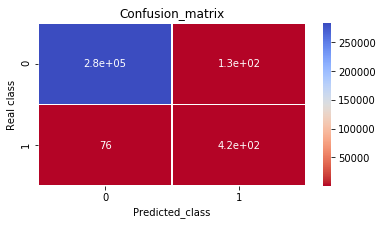

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.76      0.85      0.80       492

avg / total       1.00      1.00      1.00    284807

The loss is :  40.25308143409302
________________________________________________________________________________________________________



In [17]:
undersample_data = undersample(df_gbt2, normal_indices,fraud_indices, 167)
print ""
print "the model classification for 167 proportion"
X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
X_test = df_gbt2.iloc[:, df_gbt2.columns != "Class"]
y_test = df_gbt2.iloc[:, df_gbt2.columns == "Class"]
gbt = GradientBoostingClassifier(random_state=0)
prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
print "________________________________________________________________________________________________________"
print ""

As the table shows. The optimal result is given by the top 6 features after feature engineering when proportion equals to 79 as well as using all the features when proportion equals to 94. Other ones perform a little bit worse than these two but still acceptable.

to simplify the calculation later, we choose the top 6 features after feature engineering as our optimal feature selection for GBT.

| Features        | Precision | Recall | F1 Score |  Accuracy  | Custom Loss |
|-----------------|-----------|--------|----------|------------|-------------|
| 19 picked by fe | 0.74      | 0.88   | 0.81     | 0.99       | 37.61       |
| Top 6 after fe* | 0.68      | 0.93   | 0.79     | 0.99       | 36.80       |
| All features    | 0.75      | 0.87   | 0.80     | 0.99       | 37.95       |
| Top 13          | 0.79      | 0.79   | 0.79     | 0.99       | 44.19       |
| Top 5           | 0.76      | 0.85   | 0.80     | 0.99       | 39.51       |